<a href="https://colab.research.google.com/github/bchan9ASU/MAT421/blob/main/ModuleH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module H - MAT 421  
### Topics:  
- ODE Initial Value Problem Statement  
- Reduction of Order  
- The Euler Method  

This notebook demonstrates each concept with clearly written explanations and example Python code.  

## 1. ODE Initial Value Problem Statement

An initial value problem (IVP) is a differential equation accompanied by a specified value, called the initial condition. The goal is to find a function `y(t)` that satisfies the differential equation and also the initial condition.


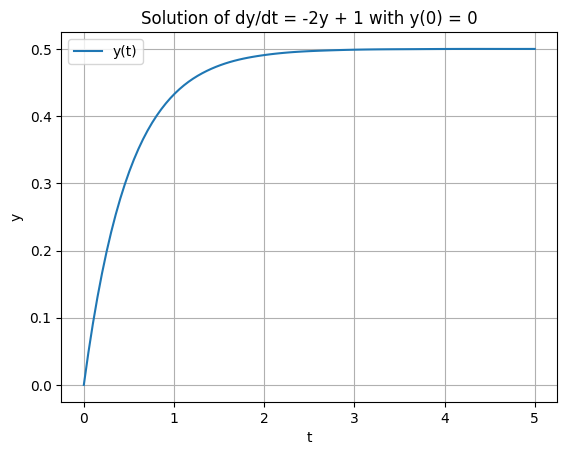

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the differential equation dy/dt = -2y + 1
def f(t, y):
    return -2 * y + 1

# Initial condition y(0) = 0
t_span = (0, 5)
y0 = [0]

# Solve the IVP
sol = solve_ivp(f, t_span, y0, t_eval=np.linspace(0, 5, 100))

# Plot the solution
plt.plot(sol.t, sol.y[0], label="y(t)")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Solution of dy/dt = -2y + 1 with y(0) = 0")
plt.grid()
plt.legend()
plt.show()

## 2. Reduction of Order

Reduction of Order is used when one solution to a second-order homogeneous linear differential equation is known, and we want to find the second linearly independent solution.

In [2]:
from sympy import Function, dsolve, Eq, Derivative, symbols, exp

x = symbols('x')
y = Function('y')

# Given: y1 = e^x is a solution to y'' - y = 0
# We want to use reduction of order to find the second solution.

# Let y = u(x) * y1 = u(x) * exp(x)
u = Function('u')
y_expr = u(x) * exp(x)

# Compute derivatives
y_prime = y_expr.diff(x)
y_double_prime = y_prime.diff(x)

# Substitute into the differential equation: y'' - y = 0
ode = Eq(y_double_prime - y_expr, 0)

# Solve the ODE
sol = dsolve(ode, u(x))
sol.simplify()

Eq(u(x), C1 + C2*exp(-2*x))

## 3. Euler Method

The Euler Method is a numerical approach for solving an initial value problem by stepping through points using the slope.

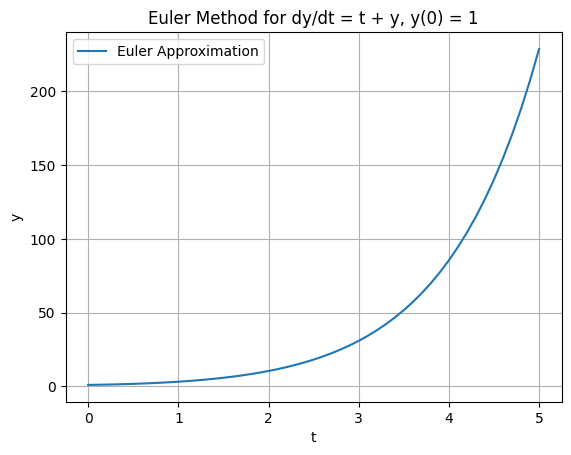

In [3]:
# Define the ODE: dy/dt = t + y, y(0) = 1
def f(t, y):
    return t + y

# Parameters
t0, y0 = 0, 1
h = 0.1  # step size
n = 50  # number of steps

# Arrays to hold the results
t_vals = [t0]
y_vals = [y0]

# Euler's Method
for i in range(n):
    t_next = t_vals[-1] + h
    y_next = y_vals[-1] + h * f(t_vals[-1], y_vals[-1])
    t_vals.append(t_next)
    y_vals.append(y_next)

# Plotting
plt.plot(t_vals, y_vals, label="Euler Approximation")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Euler Method for dy/dt = t + y, y(0) = 1")
plt.grid()
plt.legend()
plt.show()